In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from fredapi import Fred

In [2]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]



In [3]:
Fred_key = ''

# 1. Create the Fred object


In [4]:
fred = Fred(api_key=Fred_key)

In [5]:
fred

# 2. Search Fred for economic data


In [6]:
sp_search = fred.search('S&P', order_by='popularity')

In [7]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-14,2024-06-14,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-14 09:10:16-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-14,2024-06-14,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-05-28 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-14,2024-06-14,S&P 500,2014-06-16,2024-06-13,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-14 09:57:54-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-14,2024-06-14,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-14,2024-06-14,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-14 09:10:19-05:00,82,This data represents the effective yield of th...


#  3. Pull raw data and plot


In [8]:
sp500 = fred.get_series('SP500')

<Axes: title={'center': 'S&P500'}>

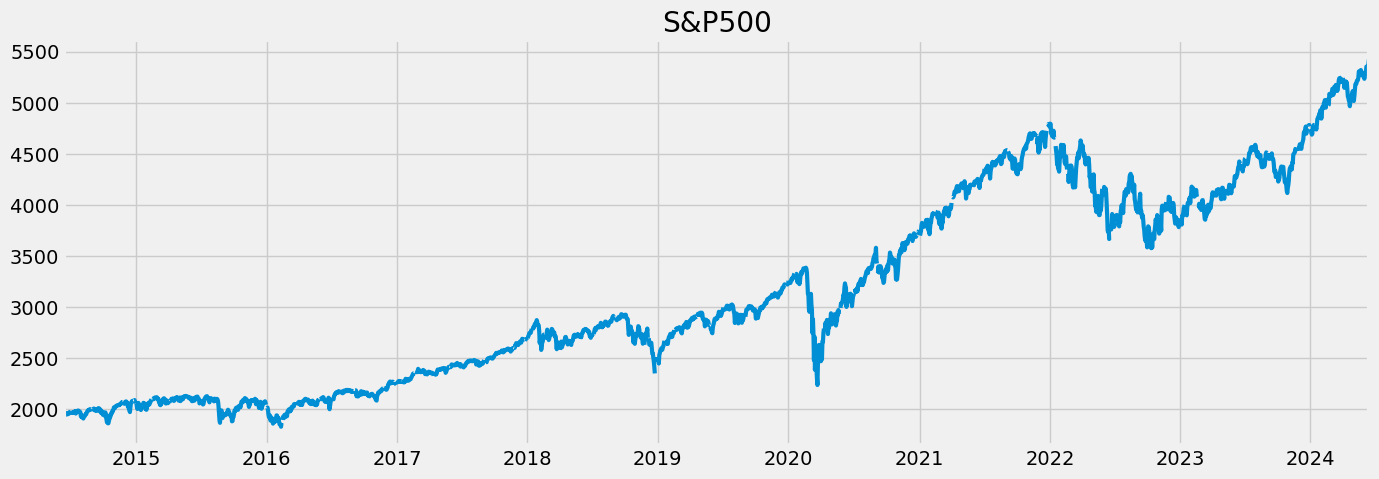

In [9]:
sp500.plot(figsize=(15, 5), title='S&P500', lw=3)

# 4. Pull and join multiple data series


In [10]:
unemp_results = fred.search('unemployment')

In [11]:
unrate = fred.get_series('UNRATE')

In [12]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-14,2024-06-14,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-06-14,2024-06-14,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-07 07:50:02-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-06-14,2024-06-14,Unemployment Level,1948-01-01,2024-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-06-07 07:51:06-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-06-14,2024-06-14,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-06-14,2024-06-14,Continued Claims (Insured Unemployment),1967-01-07,2024-06-01,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-06-13 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-06-14,2024-06-14,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-06-14,2024-06-14,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-06-14,2024-06-14,Unemployment Rate - Married Women,1955-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:42-05:00,9,To obtain estimates of women worker employment...


In [13]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
Length: 917, dtype: float64

<Axes: title={'center': 'S&P500'}>

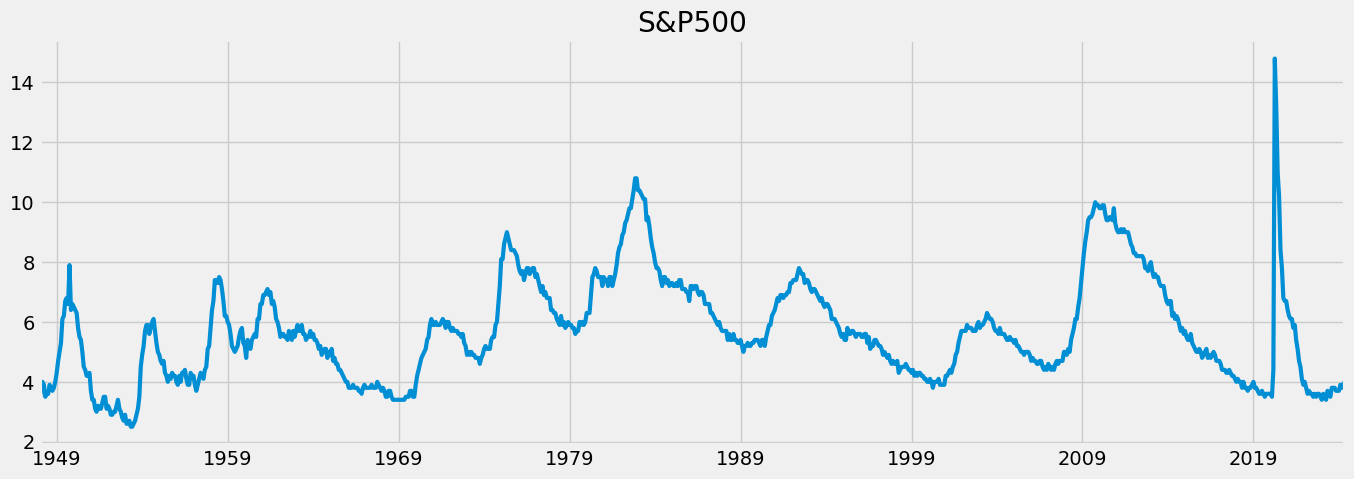

In [14]:
unrate.plot(figsize=(15, 5), title='S&P500', lw=3)

In [15]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [16]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request too fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [17]:
all_results[0]

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-01-01,3.7
2024-02-01,3.9
2024-03-01,3.8
2024-04-01,3.9


In [18]:
uemp_results

,UNRATE,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,FLUR,LNS14000002,LNS14000009,LNS14000003,PAUR,OHUR,LNS14000001,LNS14027660,MIUR,LNS14027662,ALUR,LNS14024887,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,LRUN64TTUSM156S,SCUR,NMUR,MNUR,TNUR,LNS14032183,LNS14000012,WAUR,LNS14027659,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,LASMT261982000000003,NDUR,MTUR,DCUR,MSUR,LNS14000060,LNS14000028,MEUR,NEUR,LASMT391746000000003,CTUR,IDUR,NHUR,LNS14000018,RIUR,KSUR,WYUR,DEUR,LNS14000036,VTUR,LNS14000032,SDUR,CMWRUR,LNS14200000,LRUN24TTUSM156S,LNS14027689,LNS14100000,LNS14000315,LNS14000029,LRHUTTTTUSM156S,LNS14024230,CSOUUR,LNS14000025,LNS14000061,CNERUR,LRUNTTTTUSM156S,CWSTUR,CNEWUR,LNS14000026,LNS14000048,LNS14000089,M08311USM156SNBR,LNS14000150,LRUN25TTUSM156S
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,3.7,5.3,5.2,3.9,NaN,3.4,5.3,NaN,4.5,1.8,3.1,3.4,5.0,3.4,3.4,3.7,3.9,4.3,4.0,2.1,2.9,7.3,3.0,3.5,4.7,4.8,3.1,3.4,4.2,3.2,3.0,4.3,3.740181,3.0,4.0,2.7,3.5,2.9,10.6,4.6,6.0,2.3,4.1,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,5.7,3.5,4.1,3.1,3.9,1.9,3.3,5.0,3.2,3.3,3.3,3.4,2.5,3.8,4.4,3.3,2.6,11.6,3.6,2.6,2.8,4.1,5.9,2.3,4.8,2.1,3.6,4.2,7.3,3.3,3.6,2.0,2.9,3.7,2.9,3.4,3.6,3.4,4.0,3.7,4.6,3.4,3.2,3.2,3.9,NaN,2.1,3.3
2024-02-01,3.9,5.6,5.3,3.9,NaN,3.5,6.1,NaN,4.4,1.9,3.1,3.9,5.0,3.4,3.4,3.7,3.8,4.2,3.9,2.2,3.0,8.8,2.9,3.5,4.8,4.8,3.1,3.5,4.1,3.0,3.0,4.4,3.906449,3.1,3.9,2.7,3.3,3.4,12.5,4.7,6.1,2.4,4.2,4.3,5.2,3.6,3.6,3.3,4.6,3.0,2.8,5.7,3.5,4.2,3.1,3.8,2.0,3.4,5.1,3.1,3.3,3.1,3.4,2.5,3.8,4.5,3.3,2.6,15.4,3.9,2.7,2

In [19]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [20]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [21]:
# Plot States Unemployment Rate
#px.line(uemp_states)
#uemp_states.plot(figsize=(20, 15), title='S&P500', lw=2)

px.line(uemp_states, title='Unemployment Rate USA by State').update_layout(
    xaxis_title="Rate", yaxis_title="States", 
)

## Pull MAY2020 unemployment Rate per State

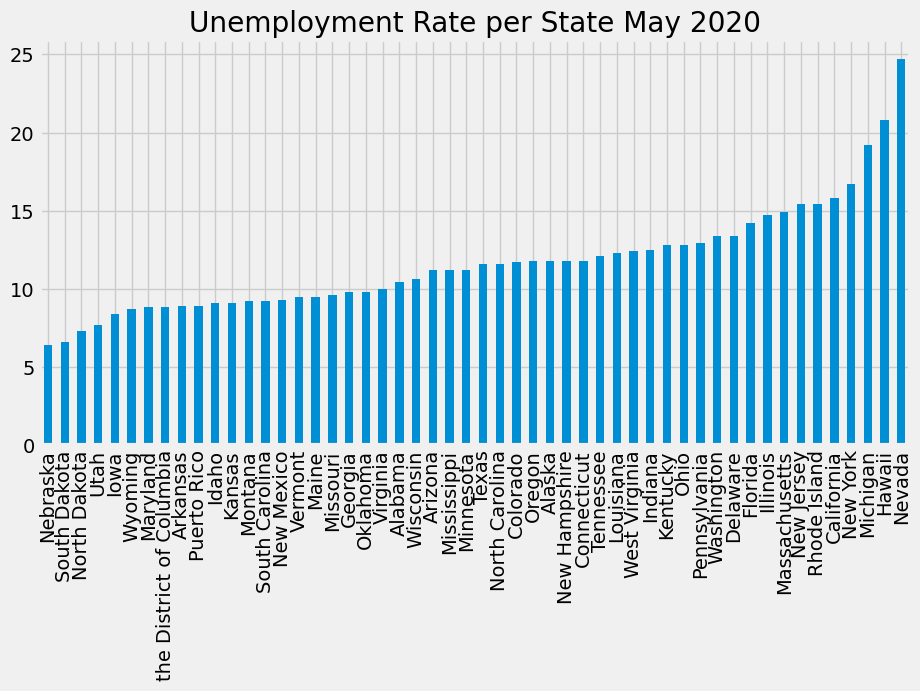

In [22]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='bar', figsize=(10,5), 
          title='Unemployment Rate per State May 2020')
ax.legend().remove()
plt.show()